In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,2*np.pi,100)
y=np.sin(2*np.pi*x)
def FF(y):
  N=len(y)
  coeff=np.zeros(N,dtype=complex)
  for i in range(N):
    sum = 0
    for j in range(N):
      sum += y[j]*np.exp((-1j*2*np.pi*i*j)/N)
    coeff[i]=sum/N
  return coeff

In [3]:
y_FF=FF(y)
#coeff = np.fft.fft(y) / len(y)

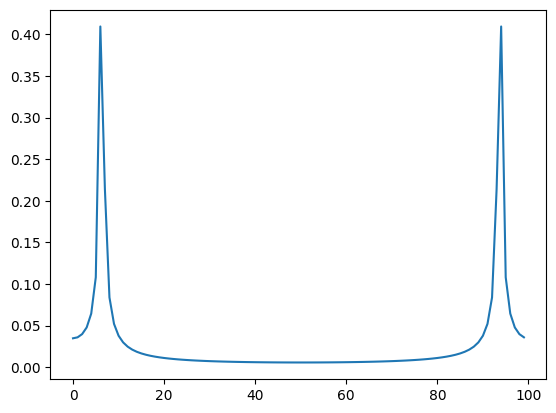

In [4]:
plt.plot(abs(y_FF))

In [6]:
def compute_freq(x,y):
  N=len(y)
  dt=x[1]-x[0]
  frequencies = np.zeros(N,dtype=float)
  for i in range(N):
    if i < N // 2:
      frequencies[i] = i / (N * dt)
    else:
      frequencies[i] = (i - N) / (N * dt)
  return frequencies

(-2.0, 2.0)

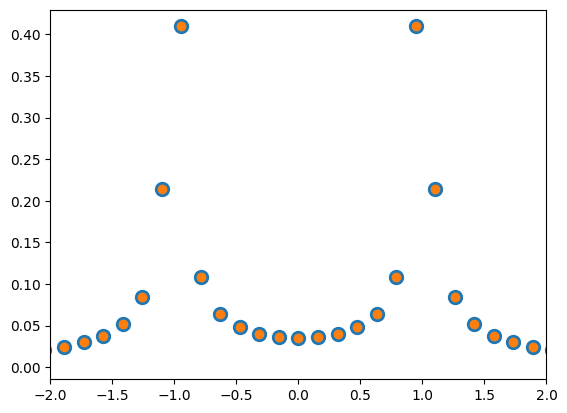

In [7]:
freq_cal=compute_freq(x,y)
freq = np.fft.fftfreq(len(y), d=(x[1] - x[0]))
plt.scatter(freq,abs(y_FF),s=100)
plt.scatter(freq_cal,abs(y_FF))
plt.xlim([-2,2])

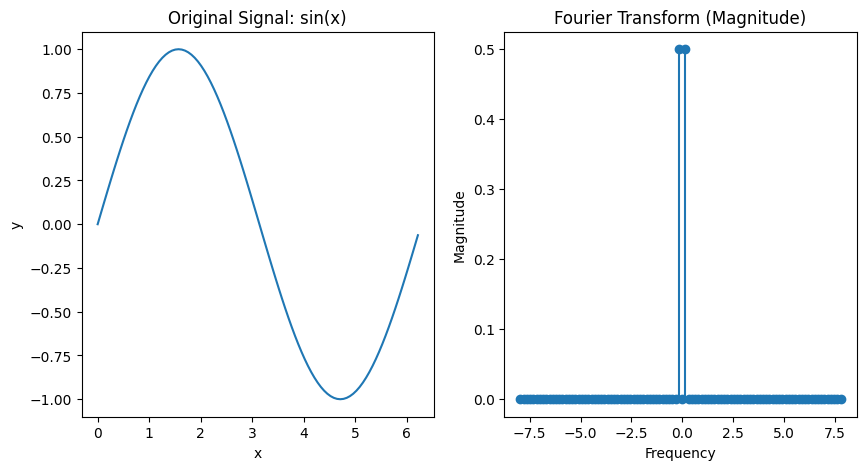

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define input signal
x = np.linspace(0, 2 * np.pi, 100, endpoint=False)  # 100 samples over [0, 2π)
y = np.sin(x)
N = len(y)  # Number of points
dt = x[1] - x[0]  # Sampling interval

# Compute Fourier Transform manually
coeff = np.fft.fft(y) / N  # Normalized FFT

# Compute frequency bins manually
frequencies = np.array([i / (N * dt) if i < N // 2 else (i - N) / (N * dt) for i in range(N)])

# Shift frequencies and coefficients for better visualization
frequencies_shifted = np.fft.fftshift(frequencies)
coeff_shifted = np.fft.fftshift(coeff)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("Original Signal: sin(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.stem(frequencies_shifted, np.abs(coeff_shifted), basefmt=" ")
plt.title("Fourier Transform (Magnitude)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()
